# [Plato’s cube and the natural geometry of fragmentation](https://arxiv.org/abs/1912.04628)

The basic idea here is that the number of vertices and edges randomly drawn on a sheet of paper should follow a certain probability (6). Here I try to simulate this. The simulation can be adjusted for any size or shape or paper and any topology. 

## Helper Functions

### Create pseduo random line segments

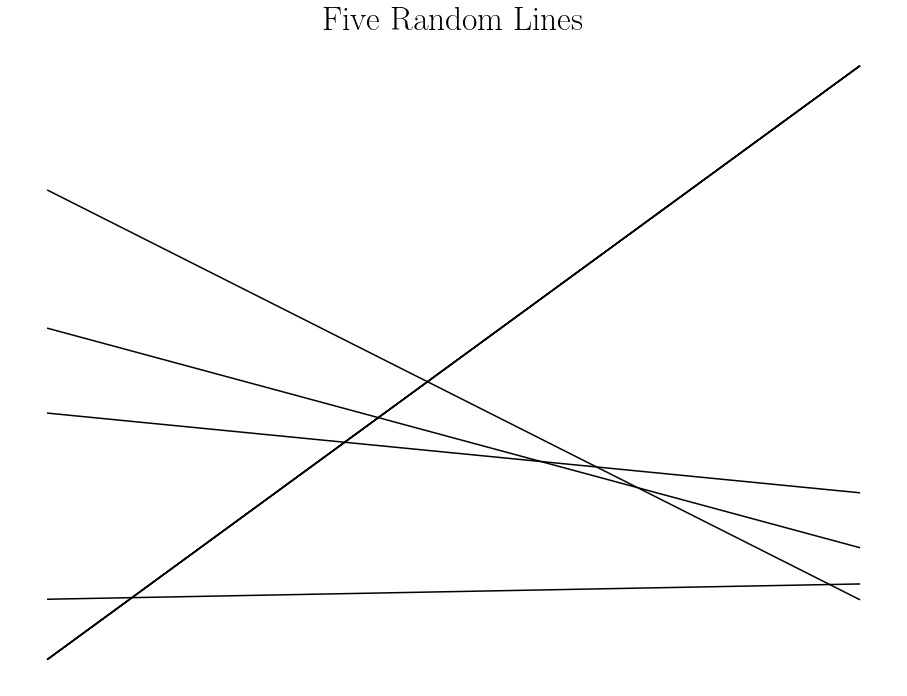

In [16]:
import numpy as np
import pylab as plt
from matplotlib import collections  as mc
from shapely.geometry import LineString

N = 5
lines = []

plt.figure(figsize=(16, 12))

for _ in range(int(N/2)):
    line_h = LineString([(np.random.random()*10,0),(np.random.random()*10,10)])
    line_v = LineString([(np.random.random()*10,0),(np.random.random()*10,10)])
    lines.append(line_h) # horizontal
    lines.append(line_v) # vertical
    plt.plot(line_h,color='black')
    plt.plot(line_v,color='black')

plt.title('Five Random Lines')
plt.rcParams.update({'font.size': 28})
plt.rc('font', family='serif')
plt.axis('off')
plt.savefig('5randomlines.png')
plt.show()


### Find all combinations of line segments (used later)

In [60]:
import itertools

combos = itertools.combinations(lines, 2)

for seg in combos:
    print("Expect two LineString objects, which define two lines from the above plot.")
    print(seg)
    break

Expect two LineString objects, which define two lines from the above plot.
(<shapely.geometry.linestring.LineString object at 0x1633593c8>, <shapely.geometry.linestring.LineString object at 0x163353ac8>)


### Check if the lines intersect

#### Test

Below is a test to check if the lines intersect.
True
POINT (0.5 0.5)


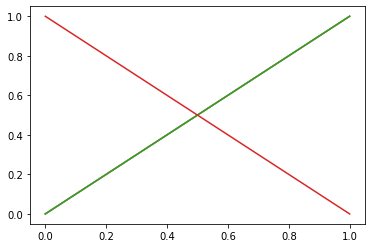

False
LINESTRING EMPTY


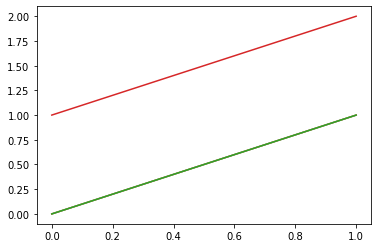

In [49]:
from shapely.geometry import LineString
import matplotlib.pyplot as plt

print("Below is a test to check if the lines intersect.")

line = LineString([(0, 0), (1, 1)])
other = LineString([(0, 1), (1, 0)])
print(line.intersects(other))
print(line.intersection(other))
# True
plt.plot(line)
plt.plot(other)
plt.show()

line = LineString([(0, 0), (1, 1)])
other = LineString([(0, 1), (1, 2)])
print(line.intersects(other))
print(line.intersection(other))
# False

plt.plot(line)
plt.plot(other)
plt.show()

#### Build

In [61]:
from shapely.geometry import LineString
import matplotlib.pyplot as plt

print("Expect either point of intersection or empty")

cnt = 0
intersections = []
for seg in combos:
    cnt += 1
    x = seg[0].intersection(seg[1])
    intersections.append(x)
    if cnt < 10:
        print(x)
        
intersections = [x.coords[:][0] for x in intersections if x.is_empty is False]

Expect either point of intersection or empty
POINT (3.368156647582434 0.724854361875451)
POINT (3.010649571695428 2.128943921035383)
POINT (2.557823102901161 3.907395201664707)
LINESTRING EMPTY
LINESTRING EMPTY
LINESTRING EMPTY
LINESTRING EMPTY
LINESTRING EMPTY
POINT (5.210193419337682 3.704633578142987)


#### Check the length, which provides the number of nodes or intersections. Use this for mosaics.

In [70]:
xx = [x.coords[:] for x in intersections if x.is_empty is False]
print(len(xx))

73


In [78]:
np.unique(xx)

array([0.23194686, 0.30553262, 0.33875862, 0.65078156, 0.66458368,
       0.84500446, 1.11805161, 1.29559957, 1.34459086, 1.38572619,
       1.51944165, 1.64178464, 1.66964335, 1.69523079, 1.74171934,
       1.90827271, 1.97048222, 2.12773964, 2.1281574 , 2.12999799,
       2.15911827, 2.29820381, 2.39918142, 2.4284456 , 2.58151795,
       2.80669413, 3.09374895, 3.13479805, 3.14815672, 3.16154114,
       3.19165606, 3.30161272, 3.30990716, 3.36004669, 3.38582417,
       3.38672061, 3.40865032, 3.5443258 , 3.58163121, 3.60968666,
       3.6583938 , 3.67620015, 3.68387828, 3.73107687, 3.78845479,
       3.86983776, 3.90874871, 3.951629  , 3.95291604, 3.99331695,
       4.08196768, 4.15140936, 4.1581962 , 4.19534225, 4.22486362,
       4.33010805, 4.36412619, 4.39254755, 4.42314748, 4.46038636,
       4.4736955 , 4.64116016, 4.67313347, 4.94030814, 4.96948917,
       5.00875749, 5.0367019 , 5.14114475, 5.22844773, 5.39554229,
       5.39582307, 5.4198205 , 5.43729336, 5.45115807, 5.48470

## Build Clean Code

In [18]:
import numpy as np
import pylab as pl
from shapely.geometry import Point, Polygon, LineString, MultiPolygon
import itertools

def count_intersections(N=2):
    '''
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    This code creates pseudo random line segments
    Lines within square [(0,10),(0,10)]
    Counts number of intersections
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    INPUT: 
            N [number of lines to draw]
    OUTPUT: 
            len(xx) [number of intersections]
            xx [intersections]
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    '''
    #N = 10
    lines = []
    for _ in range(int(N/2)):
        line_h = LineString([(np.random.random()*10,0),(np.random.random()*10,10)])
        line_v = LineString([(np.random.random()*10,0),(np.random.random()*10,10)])
        lines.append(line_h) # horizontal
        lines.append(line_v) # vertical
    combos = itertools.combinations(lines, 2)
    intersections = []
    for seg in combos:
        x = seg[0].intersection(seg[1])
        intersections.append(x)
    xx = [x.coords[:][0] for x in intersections if x.is_empty is False]
    return len(xx), xx, lines

Now we will check the number of intersections as a function of lines [2:20]

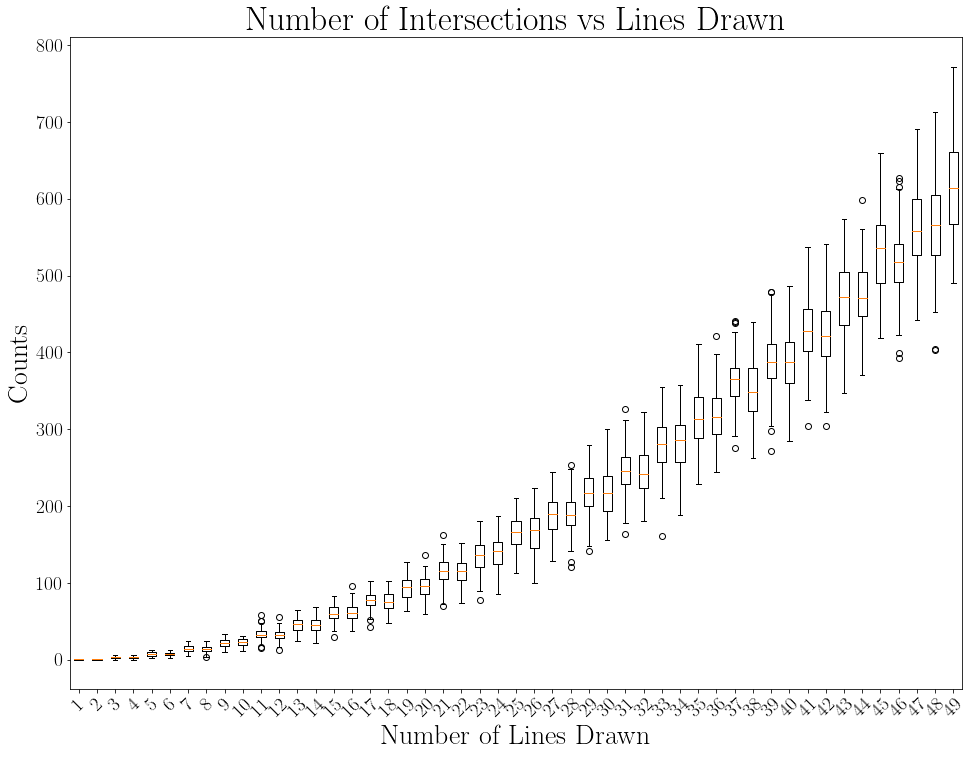

In [21]:
NUM = 50 # total number of lines drawn
intersections_global = []
for k in range(2,NUM+1):
    intersections_local = []
    for q in range(100):
        num_xs, _, lines = count_intersections(k)
        intersections_local.append(num_xs)
    intersections_global.append(intersections_local)

plt.figure(figsize=(16,12))
fig = plt.boxplot(intersections_global)
plt.rcParams.update({'font.size': 28})
plt.rc('font', family='serif')
plt.title('Number of Intersections vs Lines Drawn')
plt.xlabel('Number of Lines Drawn')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.savefig('intersections_counted.png')
plt.show()


### Does this follow a power law? 

## Now we look at the mosaics created from the randomly created lines

### Find all combinations of points for possible mosaics ($n \geq 3$)

In [28]:
intersections_count, intersections, lines = count_intersections(5)

mosaics  = []
for NN in range(3,intersections_count+1):
    mosaics.extend(itertools.combinations(intersections, NN))
    
mosaics = [mosaic for mosaic in mosaics if Polygon(mosaic).is_valid]   


In [29]:
len(mosaics)

4

In [30]:
lines

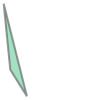

True


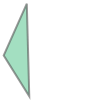

True


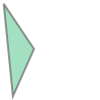

True


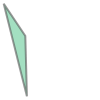

True


In [31]:
display(Polygon(mosaics[0]))
print(Polygon(mosaics[0]).is_valid)
display(Polygon(mosaics[1]))
print(Polygon(mosaics[1]).is_valid)
display(Polygon(mosaics[-2]))
print(Polygon(mosaics[-2]).is_valid)
display(Polygon(mosaics[-1]))
print(Polygon(mosaics[-1]).is_valid)

### Remove mosaic if it intersects with any of the lines & Count number of points/nodes for remaining mosaics

In [32]:
mosaics_pass = []
mosaics_size = []
for mosaic in mosaics:
    tst = []
    for line in lines:
        tst.append(line.within(Polygon(mosaic)))
    if not sum(tst*1):
        mosaics_pass.append(mosaic)
        mosaics_size.append(len(mosaic))      


In [33]:
mosaics_size

[3, 3, 3, 3]

## Rebuild Clean Code

In [2]:
import numpy as np
import pylab as plt
from shapely.geometry import Point, Polygon, LineString, MultiPolygon
import itertools
from scipy import stats

def count_intersections(N=2):
    '''
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    This code creates pseudo random line segments
    Lines within square [(0,10),(0,10)]
    Counts number of intersections
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    INPUT: 
            N [number of lines to draw]
    OUTPUT: 
            len(xx) [number of intersections]
            xx [intersections]
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    '''
    #N = 10
    lines = []
    for _ in range(int(N/2)):
        line_h = LineString([(np.random.random()*10,0),(np.random.random()*10,10)])
        line_v = LineString([(np.random.random()*10,0),(np.random.random()*10,10)])
        lines.append(line_h) # horizontal
        lines.append(line_v) # vertical
    combos = itertools.combinations(lines, 2)
    intersections = []
    for seg in combos:
        x = seg[0].intersection(seg[1])
        intersections.append(x)
    xx = [x.coords[:][0] for x in intersections if x.is_empty is False]
    return len(xx), xx, lines


def count_mosaics(max_lines):
    '''
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    This code take the line intersections from "count_intersections"
    Creates closed polygons from all combinations of points
    Removes invalid polygons
    Remove polygons with other intersection points within
    Counts number of nodes to create said polygon
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    INPUT: 
            N [number of lines to draw]
    OUTPUT: 
            len(xx) [number of intersections]
            xx [intersections]
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    '''
    global_mosaics_pass = []
    global_mosaics_size = []
    for num in range(3,max_lines+1):
        intersections_count, intersections, lines = count_intersections(num)
        mosaics  = []
        for NN in range(3,intersections_count+1):
            mosaics.extend(itertools.combinations(intersections, NN))
        mosaics = [mosaic for mosaic in mosaics if Polygon(mosaic).is_valid]  
        
        local_mosaics_pass = []
        local_mosaics_size = []
        for mosaic in mosaics:
            tst = []
            for line in lines:
                tst.append(line.within(Polygon(mosaic)))
            if not sum(tst*1):
                local_mosaics_pass.append(mosaic)
                local_mosaics_size.append(len(mosaic))
    global_mosaics_pass.append([local_mosaics_pass])
    global_mosaics_size.append([local_mosaics_size])
    
    return global_mosaics_pass, global_mosaics_size
                


In [36]:
max_lines = 10
global_mosaics_pass, global_mosaics_size = count_mosaics(max_lines)

In [ ]:
plt.figure(figsize=(20,10))
for item in global_mosaics_size[0][0]:
    plt.boxplot(global_mosaics_size[0])
    
plt.show()

In [33]:
print("Mean: ", np.mean(global_mosaics_size[0]))
print("Max: ", np.max(global_mosaics_size[0]))
print("Mode: ", stats.mode(global_mosaics_size[0])[0][0])
print("Median: ", np.median(global_mosaics_size[0]))

Mean:  6.597915891328619
Max:  15
Mode:  6
Median:  6.0


In [1]:
global_mosaics_pass[0]

NameError: name 'global_mosaics_pass' is not defined